<a href="https://colab.research.google.com/github/SpaceXdaehan/Python/blob/main/py20_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movielens Data Set

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens
* movies.dat
  * MovieID::Title::Genres
* ratings.dat
  * UserID::MovieID::Rating::Timestamp
* user.dat
  * UserID::Gender::Age::Occupation::Zip-code
* 모든 데이터 파일은 첫번째 줄부터 데이터가 작성되어 있다(컬럼 이름이 파일에 포함되어 있지 않다).

In [ ]:
# 1. 컬럼 이름들이 없어서 먼저 컬럼 이름들을 만들어줌
movies_cols = ['movie_id', 'title', 'genres'] # movies 데이터프레임의 컬럼 이름들
ratings_cole = ['user_id', 'movie_id', 'rating', 'timestamp'] # ratings 데이터프레임의 컬럼 이름들
user_cole = ['user_id', 'gender', 'age', 'occupation', 'zip_code'] # user 데이터프레임의 컬럼 이름들

## movies 데이터셋

In [ ]:
movies_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'

In [ ]:
# movies.dat 파일을 읽어서 DataFrame를 생성:
movies = pd.read_csv(movies_file,       # 파일의 경로
                     sep='::',          # csv 파일의 값(value) 구분자(seperator)
                     names=movies_cols, # DataFrame의 컬럼 이름
                     engine='python')   # warning을 제거하기 위해(sep가 두개 이상의 문자열로 이루어져 있으면 파이썬 엔진을 사용하겠다.)

In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


### 장르 분석
* 특정 장르에 해당하는 영화 개수 - (예) Animation
* 어떤 장르의 영화가 가장 많은 지.

In [ ]:
# genres 컬럼의 Animation 장르의 영화만 찾기
animations  = movies[movies.genres.str.contains('Animation')]
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [ ]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  105 non-null    int64 
 1   title     105 non-null    object
 2   genres    105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [ ]:
# 로맨틱 코미디 장르가 몇개인지 출력
romance_comedy = movies[movies.genres.str.contains('Romance') & movies.genres.str.contains('Comedy')]
romance_comedy

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [ ]:
romance_comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 2 to 3839
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  204 non-null    int64 
 1   title     204 non-null    object
 2   genres    204 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


* 가장 빈번한 장르를 출력
* 장르의 빈도수 순서를 출력

In [ ]:
# 리스트 메서드: append vs extend

a = []
a.append([1, 2])
print(a)
a.append([3, 4])
print(a)

b = []
b.extend([1, 2])
print(b)
b.extend([3, 4])
print(b)

[[1, 2]]
[[1, 2], [3, 4]]
[1, 2]
[1, 2, 3, 4]


In [ ]:
genres = []
for s in movies.genres:
  #print(s.split('|'))
  genres.extend(s.split('|'))
print(genres)

['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

In [ ]:
pd.Series(genres).value_counts()

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [ ]:
genre_counts = pd.value_counts(genres)
genre_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

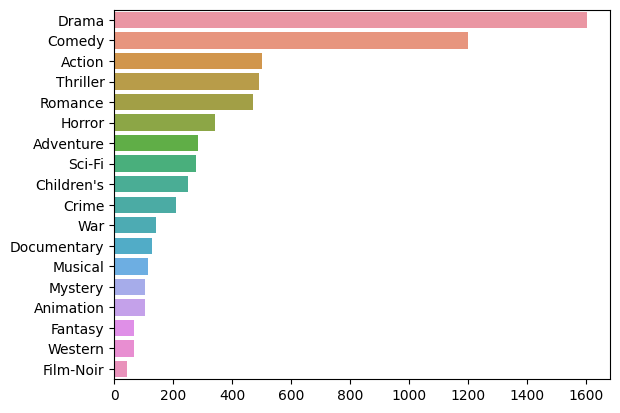

In [ ]:
# 장르 빈도수 시각화
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

### 연도별 개봉 영화 수

In [ ]:
# 타이틀 컬럼에서 연도별 정보를 출력해 연도별 개봉 영화 수를 출력.
movies['year'] = movies.title.str[-5:-1].astype(int)

In [ ]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
movies.tail()

,movie_id,title,genres,year
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [ ]:
year_counts = movies.year.value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

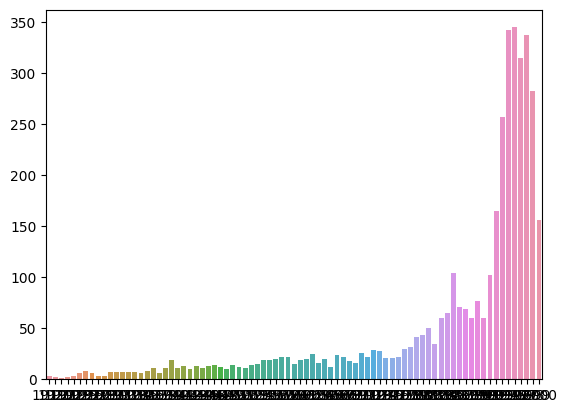

In [ ]:
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xticks()
plt.show()

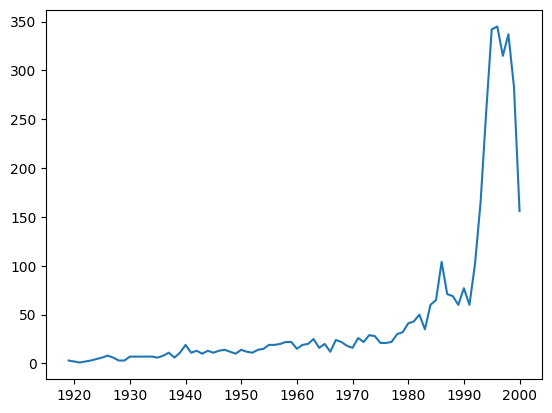

In [ ]:
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.show()

## users 데이터셋

In [ ]:
users_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/users.dat'

In [ ]:
users = pd.read_csv(users_file,
                    sep='::',
                    names=user_cole,
                    engine='python')

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.tail()

,user_id,gender,age,occupation,zip_code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


### 성별 빈도수

In [ ]:
gender_count = users.gender.value_counts()
gender_count

M    4331
F    1709
Name: gender, dtype: int64

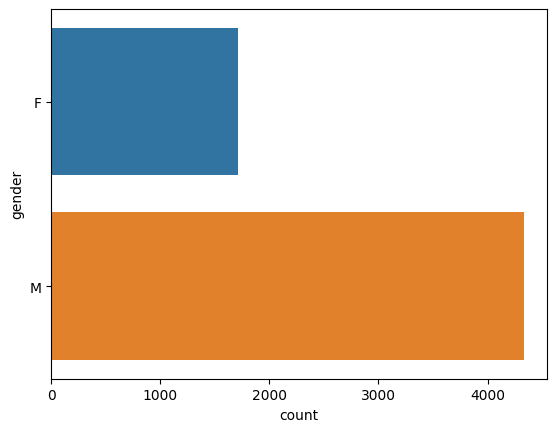

In [ ]:
sns.countplot(data=users, y='gender')
plt.show()

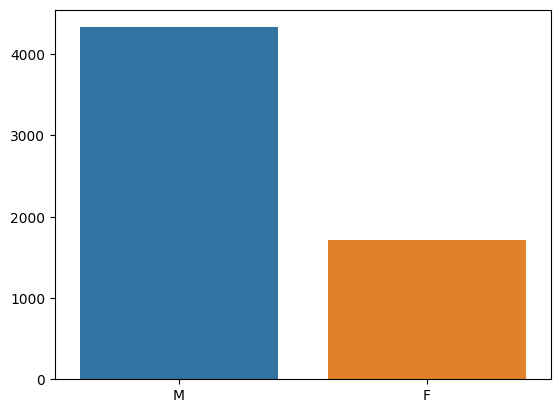

In [ ]:
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.show()

### 연령대 빈도수

In [ ]:
age_count = users.age.value_counts()
age_count

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

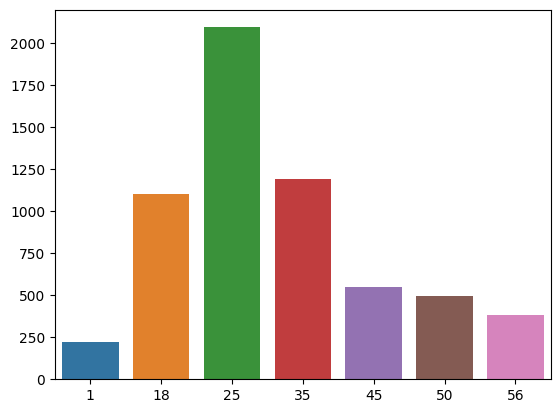

In [ ]:
sns.barplot(x=age_count.index, y=age_count.values)
plt.show()

### 직업 빈도수

In [ ]:
occupation_count = users.occupation.value_counts()
occupation_count

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: occupation, dtype: int64

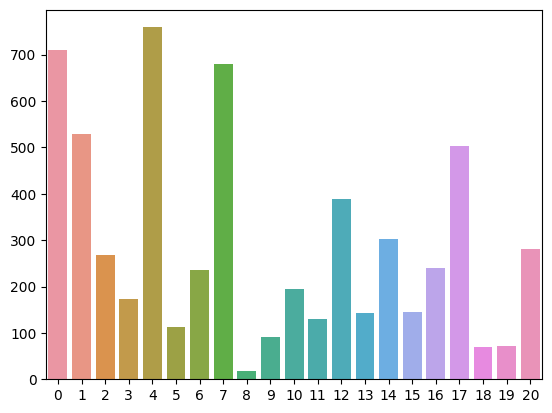

In [ ]:
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.show()

## ratings 데이터셋

In [ ]:
ratings_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/ratings.dat'

In [ ]:
ratings = pd.read_csv(ratings_file,
                    sep='::',
                    names=ratings_cole,
                    engine='python')

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.tail()

,user_id,movie_id,rating,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


### rating의 기술 통계량

In [ ]:
ratings.rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

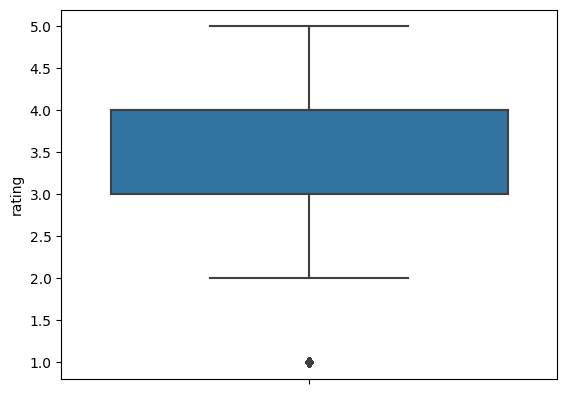

In [ ]:
sns.boxplot(data=ratings, y='rating')
plt.show()

In [ ]:
ratings.rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

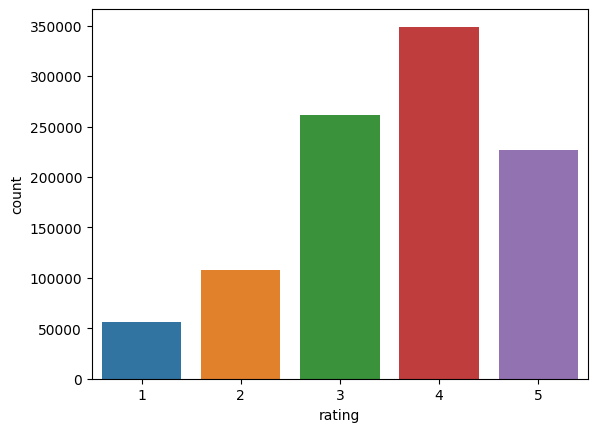

In [ ]:
sns.countplot(data=ratings, x='rating')
plt.show()

# 데이터 프레임 합치기(merge, join)

In [ ]:
# ratings와 movies 데이터프래임을 합치기.
df = pd.merge(ratings, movies)

`pd.merge()` 함수 파라미터:

* SQL의 join 기능
* left, right 아규먼트: merge할 데이터프래임객체 또는 시리즈 객체를 넘겨준다.
* how: join방식: 기본값은 `inner` 사용 가능한 값은 inner, left, right, outer.
* on: join을 할 때 사용할 변수(컬럼) 이름. 두 데이터프래임에 컬럼 이름이 같은 경우 생략 가능하다.

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
 6   year       1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [ ]:
# df와 users 데이터프레임을 합침:
df = pd.merge(df, users)

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,year,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1996,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,1964,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,2000,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998,F,1,10,48067


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   year        1000209 non-null  int64 
 7   gender      1000209 non-null  object
 8   age         1000209 non-null  int64 
 9   occupation  1000209 non-null  int64 
 10  zip_code    1000209 non-null  object
dtypes: int64(7), object(4)
memory usage: 91.6+ MB


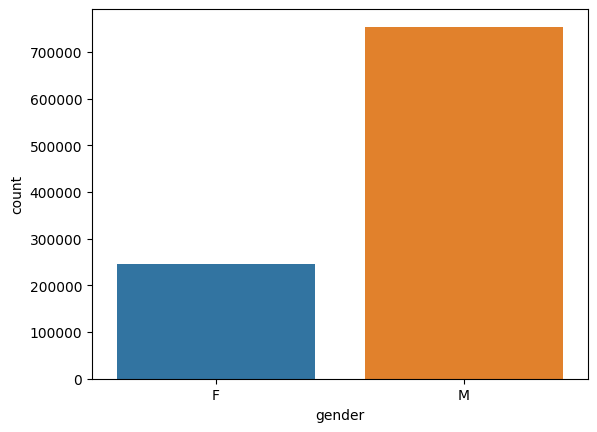

In [ ]:
# 성별 빈도수
sns.countplot(data=df, x='gender')
plt.show()

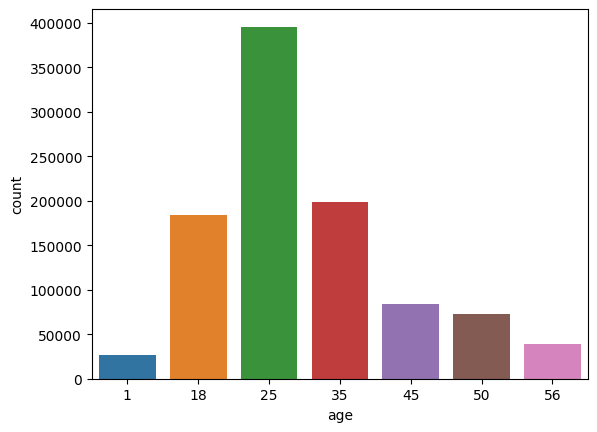

In [ ]:
# 연령대별 빈도수
sns.countplot(data=df, x='age')
plt.show()

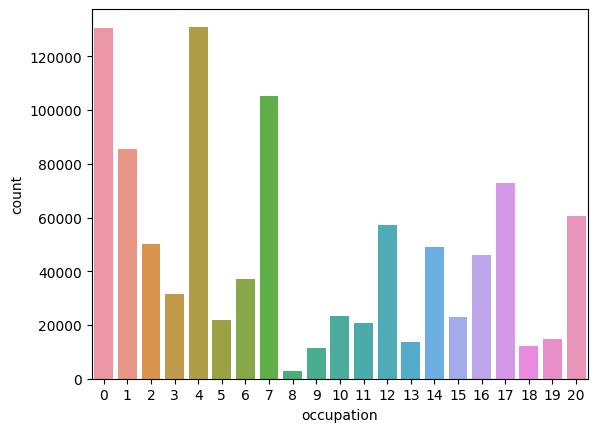

In [ ]:
# 직업 빈도수
sns.countplot(data=df, x='occupation')
plt.show()

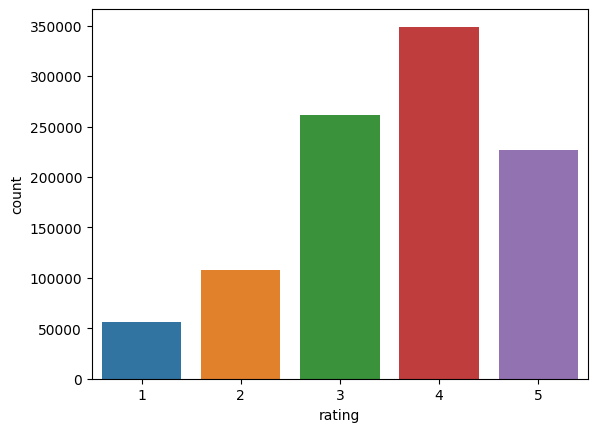

In [ ]:
sns.countplot(data=df, x='rating')
plt.show()

## 영화 별점 평균의 상위/하위 10개 영화 제목 출력

### sort_values(ascending=True/False)함수

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,year,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1996,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,1964,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,2000,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998,F,1,10,48067


In [ ]:
by_title = df.groupby('title').rating.mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 별점 평균 상위 10개
by_title.sort_values(ascending=False).head(n=10) # 내림차순 정렬

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [ ]:
# 별점 평균 하위 10개
by_title.sort_values(ascending=True).head(n=10)

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens öga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

In [ ]:
df[df.title == 'Ulysses (Ulisse) (1954)']

,user_id,movie_id,rating,timestamp,title,genres,year,gender,age,occupation,zip_code
508633,3485,3172,5,967060437,Ulysses (Ulisse) (1954),Adventure,1954,M,25,0,94121


별점 개수가 1~2개 밖에 없는 영화들의 별점 평균은 큰 의미가 없다. 일정 개수(예: 10개, 50개, 100개) 이상의 별점 건수가 있는 영화들 중에서 별점 평균을 계산하는 것이 의미가 더 있다.

In [ ]:
# 영화 제목 빈도수
title_count = df.title.value_counts()
title_count

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

In [ ]:
# 영화 제목 빈도수 상위 10개
title_count.head(10)

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

In [ ]:
# 영화 제목 기술 통계량
title_count.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

150건 이상의 별점을 받은 영화들에 대해서만 별점 평균을 분석.

In [ ]:
indexer = title_count[title_count >= 150].index
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Alligator (1980)', 'Cowboy Way, The (1994)', 'Twelfth Night (1996)',
       'Program, The (1993)', 'Love and Death on Long Island (1997)',
       'Asphalt Jungle, The (1950)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Golden Voyage of Sinbad, The (1974)', 'In the Army Now (1994)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들의 별점 평균.
by_title_150 = by_title.loc[indexer]
by_title_150

American Beauty (1999)                                     4.317386
Star Wars: Episode IV - A New Hope (1977)                  4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)      4.292977
Star Wars: Episode VI - Return of the Jedi (1983)          4.022893
Jurassic Park (1993)                                       3.763847
                                                             ...   
Asphalt Jungle, The (1950)                                 3.927152
Tales from the Crypt Presents: Bordello of Blood (1996)    2.589404
Golden Voyage of Sinbad, The (1974)                        3.397351
In the Army Now (1994)                                     2.225166
Police Academy 5: Assignment: Miami Beach (1988)           1.766667
Name: rating, Length: 1683, dtype: float64

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 별점 평균 상위 10개 내림차순
by_title_150.sort_values(ascending=True)

Battlefield Earth (2000)                                               1.611111
Baby Geniuses (1999)                                                   1.701220
Police Academy 5: Assignment: Miami Beach (1988)                       1.766667
Stop! Or My Mom Will Shoot (1992)                                      1.782123
Jaws 3-D (1983)                                                        1.852381
                                                                         ...   
Usual Suspects, The (1995)                                             4.517106
Close Shave, A (1995)                                                  4.520548
Godfather, The (1972)                                                  4.524966
Shawshank Redemption, The (1994)                                       4.554558
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Name: rating, Length: 1683, dtype: float64

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 별점 하위 10개
by_title_150.sort_values(ascending=True).head(10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

## 성별 별점 평균

제목별 성별 별점 평균

In [ ]:
df.groupby(['title', 'gender']).rating.mean()

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

In [ ]:
df.pivot_table(values='rating', index='title', columns='gender')

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
by_gender = df.groupby('title').rating.mean()
by_gender

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
by_gender = df.pivot_table(values='rating', index='title', columns='gender')
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 여성 별점 평균 상위 10개 영화를 찾기.
by_gender.loc[indexer].F.sort_values(ascending=False).head(10)

Close Shave, A (1995)                                     4.644444
Wrong Trousers, The (1993)                                4.588235
General, The (1927)                                       4.575758
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)             4.572650
Wallace & Gromit: The Best of Aardman Animation (1996)    4.563107
Schindler's List (1993)                                   4.562602
Grand Illusion (Grande illusion, La) (1937)               4.560976
Shawshank Redemption, The (1994)                          4.539075
Grand Day Out, A (1992)                                   4.537879
To Kill a Mockingbird (1962)                              4.536667
Name: F, dtype: float64

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 남성 별점 평균 상위 10개 영화를 찾기.
by_gender.loc[indexer].F.sort_values(ascending=False).head(10)

Close Shave, A (1995)                                     4.644444
Wrong Trousers, The (1993)                                4.588235
General, The (1927)                                       4.575758
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)             4.572650
Wallace & Gromit: The Best of Aardman Animation (1996)    4.563107
Schindler's List (1993)                                   4.562602
Grand Illusion (Grande illusion, La) (1937)               4.560976
Shawshank Redemption, The (1994)                          4.539075
Grand Day Out, A (1992)                                   4.537879
To Kill a Mockingbird (1962)                              4.536667
Name: F, dtype: float64

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들 중에서 남성 별점 평균 상위 10개 영화
by_gender.loc[indexer].M.sort_values(ascending=False).head(10)

Godfather, The (1972)                                                  4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.576628
Shawshank Redemption, The (1994)                                       4.560625
Raiders of the Lost Ark (1981)                                         4.520597
Usual Suspects, The (1995)                                             4.518248
Star Wars: Episode IV - A New Hope (1977)                              4.495307
Schindler's List (1993)                                                4.491415
Paths of Glory (1957)                                                  4.485149
Wrong Trousers, The (1993)                                             4.478261
Close Shave, A (1995)                                                  4.473795
Name: M, dtype: float64

150건 이상의 별점 리뷰가 있는 영화들 중에서

* 여성 별점 평균 상위 100위 영화들의 장르를 찾고,
* 남성 별점 평균 상위 100위 영화들의 장르를 찾기.

In [ ]:
female_top100 = by_gender.loc[indexer].sort_values(by='F', ascending=False).head(100)

In [ ]:
female_top100_titles = female_top100.index
female_top100_titles

Index(['Close Shave, A (1995)', 'Wrong Trousers, The (1993)',
       'General, The (1927)', 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'Schindler's List (1993)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Shawshank Redemption, The (1994)', 'Grand Day Out, A (1992)',
       'To Kill a Mockingbird (1962)', 'Creature Comforts (1990)',
       'Usual Suspects, The (1995)', 'It Happened One Night (1934)',
       '400 Blows, The (Les Quatre cents coups) (1959)', 'Rear Window (1954)',
       'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
       'Sixth Sense, The (1999)', 'Third Man, The (1949)',
       'Some Like It Hot (1959)', 'City Lights (1931)', 'Notorious (1946)',
       'Philadelphia Story, The (1940)', 'Yojimbo (1961)',
       'Life Is Beautiful (La Vita è bella) (1997)',
       'Strangers on a Train (1951)',
       'Bicycle Thief, The (Ladri di biciclette) (1948)',


In [ ]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
movies_with_index = movies.set_index('title')
movies_with_index.head()

,movie_id,genres,year
title,,,
Toy Story (1995),1,Animation|Children's|Comedy,1995
Jumanji (1995),2,Adventure|Children's|Fantasy,1995
Grumpier Old Men (1995),3,Comedy|Romance,1995
Waiting to Exhale (1995),4,Comedy|Drama,1995
Father of the Bride Part II (1995),5,Comedy,1995


In [ ]:
df1 = movies_with_index.loc[female_top100_titles]
df1

,movie_id,genres,year
"Close Shave, A (1995)",745,Animation|Comedy|Thriller,1995
"Wrong Trousers, The (1993)",1148,Animation|Comedy,1993
"General, The (1927)",3022,Comedy,1927
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),922,Film-Noir,1950
Wallace & Gromit: The Best of Aardman Animation (1996),720,Animation,1996
...,...,...,...
"Killer, The (Die xue shuang xiong) (1989)",1218,Action|Thriller,1989
Monty Python and the Holy Grail (1974),1136,Comedy,1974
"Sound of Music, The (1965)",1035,Musical,1965
Sense and Sensibility (1995),17,Drama|Romance,1995


In [ ]:
genres = []
for s in df1.genres:
  genres.extend(s.split('|'))
print(genres)

['Animation', 'Comedy', 'Thriller', 'Animation', 'Comedy', 'Comedy', 'Film-Noir', 'Animation', 'Drama', 'War', 'Drama', 'War', 'Drama', 'Animation', 'Comedy', 'Drama', 'Animation', 'Comedy', 'Crime', 'Thriller', 'Comedy', 'Drama', 'Mystery', 'Thriller', 'Action', 'Drama', 'Thriller', 'Mystery', 'Thriller', 'Comedy', 'Crime', 'Comedy', 'Drama', 'Romance', 'Film-Noir', 'Romance', 'Thriller', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Western', 'Comedy', 'Drama', 'Film-Noir', 'Thriller', 'Drama', 'Drama', 'Documentary', 'Drama', 'War', 'Drama', 'War', 'Sci-Fi', 'War', 'Drama', 'War', 'Drama', 'Thriller', 'Drama', 'Drama', 'Film-Noir', 'Thriller', 'Adventure', "Children's", 'Drama', 'Musical', 'Comedy', 'Romance', 'Film-Noir', 'Thriller', 'Drama', 'Drama', 'Mystery', 'Thriller', 'Film-Noir', 'Mystery', 'Action', 'Adventure', 'Comedy', 'Romance', 'Musical', 'Romance', 'Documentary', 'Comedy', 'Drama', 'Musical', 'Romance', 'Action', 'Adventure', 'Drama', 'Drama', 'Thriller', 'Comedy', 'Action

In [ ]:
genre_counts = pd.value_counts(genres)
genre_counts

Drama          45
Comedy         28
Thriller       23
Romance        20
Mystery        13
War            12
Film-Noir      11
Action          9
Crime           8
Adventure       6
Musical         6
Animation       5
Documentary     3
Sci-Fi          2
Children's      1
Western         1
Fantasy         1
Horror          1
dtype: int64

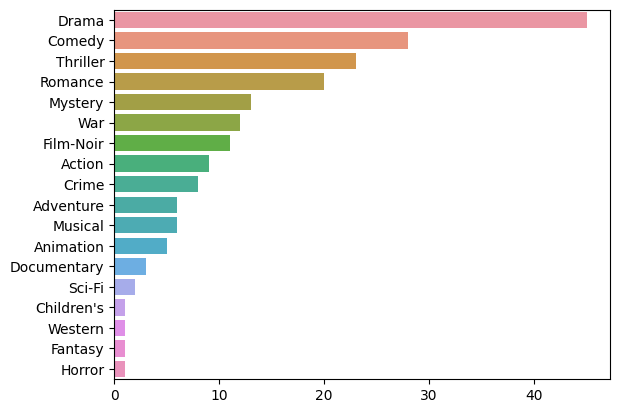

In [ ]:
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

In [ ]:
male_top100 = by_gender.loc[indexer].sort_values(by='M', ascending=False).head(100)
male_top100

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
...,...,...
"Christmas Story, A (1983)",4.278592,4.225519
"African Queen, The (1951)",4.324232,4.223822
Toy Story 2 (1999),4.208238,4.222997
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300


In [ ]:
male_top100_titles = male_top100.index

In [ ]:
df2 = movies_with_index.loc[male_top100_titles]

In [ ]:
genres = []
for s in df2.genres:
    genres.extend(s.split('|'))

print(genres)

['Action', 'Crime', 'Drama', 'Action', 'Drama', 'Drama', 'Action', 'Adventure', 'Crime', 'Thriller', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Drama', 'War', 'Drama', 'War', 'Animation', 'Comedy', 'Animation', 'Comedy', 'Thriller', 'Mystery', 'Thriller', 'Crime', 'Film-Noir', 'Sci-Fi', 'War', 'Film-Noir', 'Drama', 'Romance', 'War', 'Mystery', 'Thriller', 'Adventure', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Film-Noir', 'Mystery', 'Adventure', 'War', 'Drama', 'Comedy', 'Drama', 'Western', 'Drama', 'War', 'Action', 'Drama', 'War', 'Drama', 'Thriller', 'Animation', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Film-Noir', 'Mystery', 'Thriller', 'Action', 'Sci-Fi', 'Thriller', 'Comedy', 'Crime', 'Adventure', 'Comedy', 'Drama', 'Crime', 'Drama', 'Documentary', 'Action', 'Adventure', 'Drama', 'Sci-Fi', 'War', 'Drama', 'Drama', 'Action', 'Drama', 'War', 'Drama', 'Crime', 'Drama', 'Comedy', 'Drama', 'Film-Noir', 'Thriller', 'Drama', 'War', 'Film-Noir

In [ ]:
genre_counts = pd.value_counts(genres)
genre_counts

Drama          51
Comedy         23
War            20
Thriller       19
Action         14
Crime          13
Film-Noir      13
Mystery         9
Adventure       8
Romance         7
Animation       6
Sci-Fi          5
Western         4
Horror          2
Fantasy         1
Documentary     1
Musical         1
Children's      1
dtype: int64

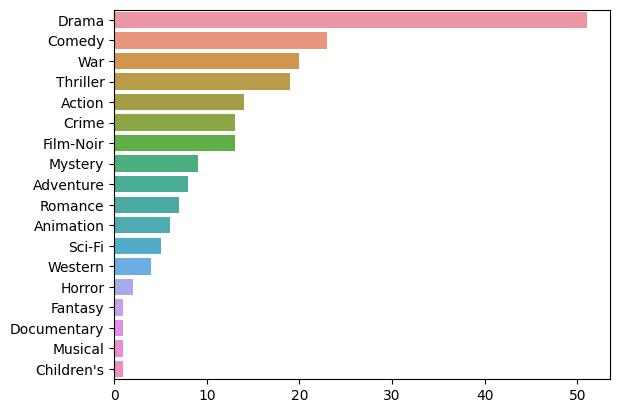

In [ ]:
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

## 연령대별 별점 평균
제목별, 연령대별 별점 평균

In [ ]:
df.groupby(['title', 'age']).rating.mean()

title                   age
$1,000,000 Duck (1971)  18     3.000000
                        25     3.090909
                        35     3.133333
                        45     2.000000
                        50     2.750000
                                 ...   
eXistenZ (1999)         25     3.234973
                        35     3.364865
                        45     3.222222
                        50     3.291667
                        56     2.200000
Name: rating, Length: 22457, dtype: float64

In [ ]:
by_age = df.pivot_table(values='rating', index='title', columns='age')
by_age

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN


In [ ]:
# 별점 리뷰가 150건 이상인 영화들 중에서 25~34세 연령대의 별점 평균
age25 = by_age.loc[indexer].iloc[:, 2]
age25

American Beauty (1999)                                     4.330585
Star Wars: Episode IV - A New Hope (1977)                  4.572695
Star Wars: Episode V - The Empire Strikes Back (1980)      4.390306
Star Wars: Episode VI - Return of the Jedi (1983)          4.058201
Jurassic Park (1993)                                       3.702000
                                                             ...   
Asphalt Jungle, The (1950)                                 3.941176
Tales from the Crypt Presents: Bordello of Blood (1996)    2.354839
Golden Voyage of Sinbad, The (1974)                        3.396226
In the Army Now (1994)                                     2.085106
Police Academy 5: Assignment: Miami Beach (1988)           1.478261
Name: 25, Length: 1683, dtype: float64

In [ ]:
titles = age25.sort_values(ascending=False).head(100).index
df4 = movies_with_index.loc[titles]
genres = []
for s in df4.genres:
    genres.extend(s.split('|'))

genre_counts = pd.value_counts(genres)
genre_counts


Drama          46
Comedy         25
Thriller       24
Crime          15
War            15
Film-Noir      14
Action         12
Romance        11
Mystery        10
Adventure       6
Sci-Fi          6
Animation       5
Documentary     3
Western         3
Horror          3
Musical         2
Fantasy         1
dtype: int64

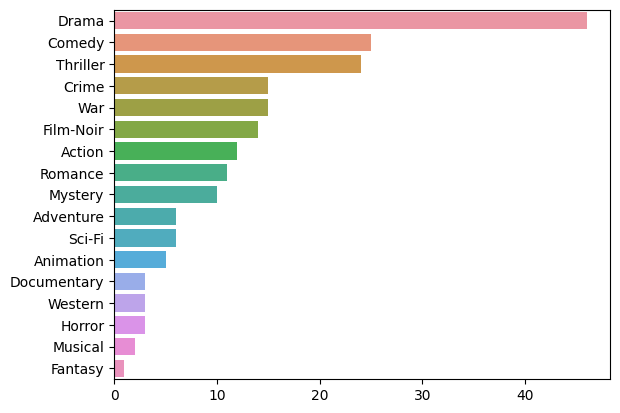

In [ ]:
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

## 연습문제
50건 이상의 별점 리뷰가 있는 영화들 중에서

1. 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
1. 여성 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
1. 남성 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
1. 25~34세 연령대에서 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
를 찾으세요.

In [ ]:
index_rating50 = title_count[title_count >= 50].index
index_rating50

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Crossing Guard, The (1995)', 'Heidi Fleiss: Hollywood Madam (1995)',
       'Thousand Acres, A (1997)', 'Jude (1996)', 'Hear My Song (1991)',
       'House Arrest (1996)', 'Washington Square (1997)',
       'Love Is a Many-Splendored Thing (1955)', 'Associate, The (1996)',
       'Myth of Fingerprints, The (1997)'],
      dtype='object', length=2514)